<a href="https://colab.research.google.com/github/rmynzl/calismalarim/blob/main/R%C3%BCmeysa_Nazl%C4%B1_234329040_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [43]:
from google.colab import drive
drive.mount('/content/drive')

# veri
file_path = '/content/drive/My Drive/Churn_Modelling.csv'
data = pd.read_csv(file_path)

data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


print(data.head(10))  # verinin ilk 10 satırı

# Müşteri bankadaki hesabı kapatmışsa 1, müşteri elde tutuluyorsa 0

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   
5          645     Spain    Male   44       8  113755.78              2   
6          822    France    Male   50       7       0.00              2   
7          376   Germany  Female   29       4  115046.74              4   
8          501    France    Male   44       4  142051.07              2   
9          684    France    Male   27       2  134603.88              1   

   HasCrCard  IsActiveMember  EstimatedSalary

In [ ]:
# Verinin temel özellikleri
print(data.head())
print(data.describe())

   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0  
        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   7

In [ ]:
# Eksik Değer kontrolü
print(data.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Eksik değer bulunmamaktadır.


In [ ]:
# veride kayıp olan ve olmayan müşterilerin sayıları

data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

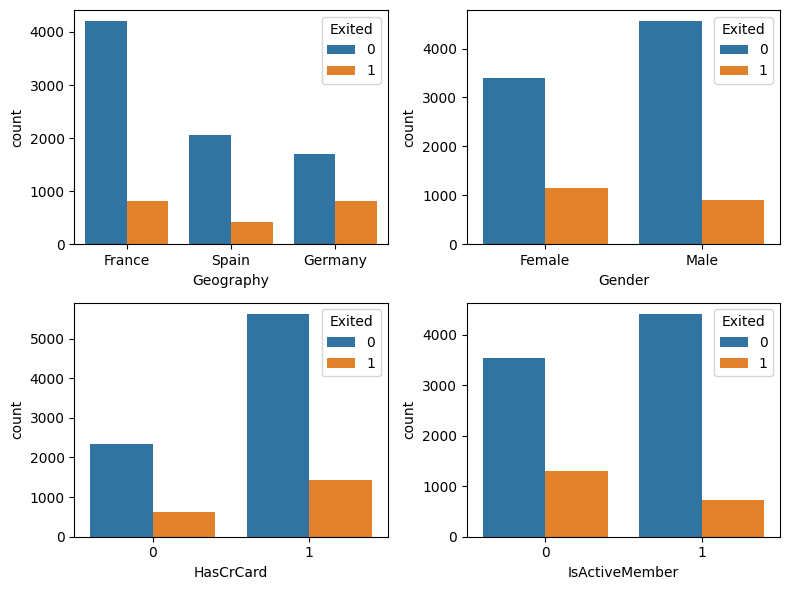

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (8, 6))

sns.countplot(x='Geography', hue = 'Exited', data = data, ax = ax[0][0])
sns.countplot(x='Gender', hue = 'Exited', data = data, ax = ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = data, ax = ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = data, ax = ax[1][1])

plt.tight_layout()
plt.show()

* Veri setindeki müşterilerin en büyük oranı Fransa'dandır.
* Müşteri kaybına uğrayan müşterilerin çoğunluğu kredi kartına sahiptir.
* Aktif olmayan üyeler daha yüksek bir kayıp oranı sergiliyor

In [46]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


# Kategorik özellikleri sayısal değerlere dönüştürme ve One Hot Encoding
onehotencoder = OneHotEncoder()

# Geography sütunu için One Hot Encoding
geo_encoded = onehotencoder.fit_transform(data[['Geography']]).toarray()
geo_encoded_df = pd.DataFrame(geo_encoded, columns=onehotencoder.get_feature_names_out(['Geography']))

# Gender sütunu için Label Encoding ve ardından One Hot Encoding
gender_encoded = onehotencoder.fit_transform(data[['Gender']]).toarray()
gender_encoded_df = pd.DataFrame(gender_encoded, columns=onehotencoder.get_feature_names_out(['Gender']))

# Orijinal dataframe'den Geography ve Gender sütunlarını kaldır ve yeni encode edilmiş sütunları ekle
data = data.drop(['Geography', 'Gender'], axis=1)
data = pd.concat([data, geo_encoded_df, gender_encoded_df], axis=1)

# Bağımlı değişkeni One Hot Encoding ile dönüştürme
X = data.drop('Exited', axis=1)  # bağımsız değişkenler
y = to_categorical(data['Exited']) # bağımlı değişken

print(X.head())
print(y[:5])


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0               1        101348.88               1.0                0.0   
1               1        112542.58               0.0                0.0   
2               0        113931.57               1.0                0.0   
3               0         93826.63               1.0                0.0   
4               1         79084.10               0.0                0.0   

   Geography_Spain  Gender_Female  Gender_Male  
0              0.0            1.0          0.0  
1              1.0            1.0         

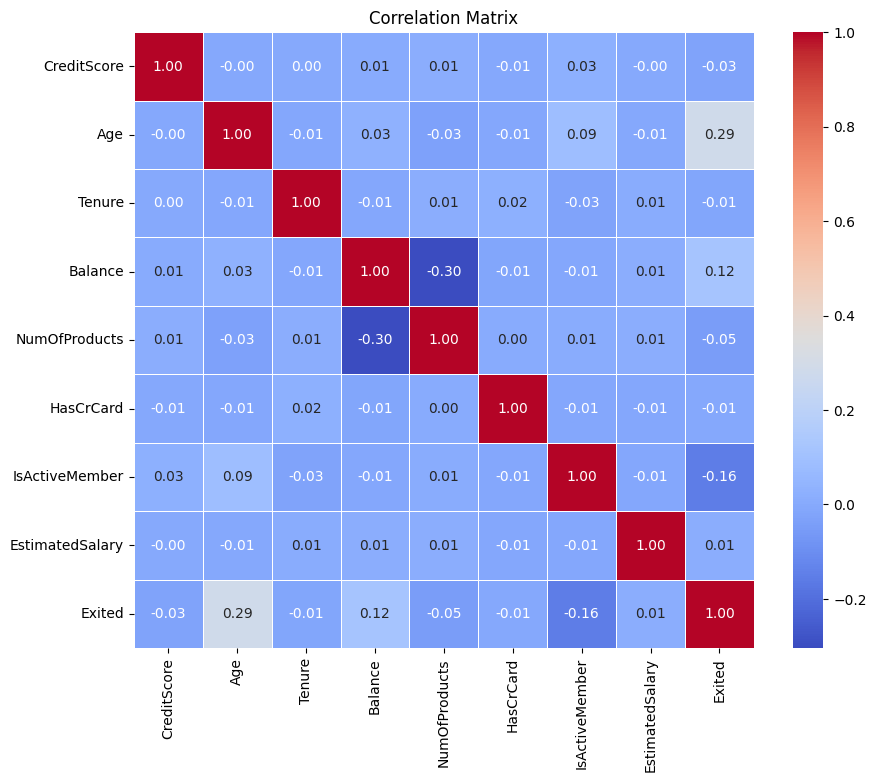

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korelasyon matrisinin oluşturulması
correlation_matrix = numerical_data.corr()

# Korelasyon matrisi için ısı haritası oluşturma
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* "Age" (Yaş) değişkeni ile "Exited" arasındaki korelasyon, pozitif bir değere sahiptir. Bu, yaşın artmasıyla müşteri hesabının kapatılma olasılığının da arttığını gösterebilir. (0.29)

* "IsActiveMember değişkeni ile "Exited" arasındaki korelasyon, negatif bir değere sahiptir. Bu müşterilerin aktifliği azaldıkça hesabının kapatılma olasılığının da azaldığını gösterebilir. (-0.16)

In [ ]:
# Veriyi %30 test %70 train olacak şekilde ayırıyoruz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_0,Geography_1,Geography_2,Gender_0,Gender_1
6252,596,32,3,96709.07,2,0,0,41788.37,0.0,1.0,0.0,0.0,1.0
4684,623,43,1,0.00,2,1,1,146379.30,1.0,0.0,0.0,0.0,1.0
1731,601,44,4,0.00,2,1,0,58561.31,0.0,0.0,1.0,1.0,0.0
4742,506,59,8,119152.10,2,1,1,170679.74,0.0,1.0,0.0,0.0,1.0
4521,560,27,7,124995.98,1,1,1,114669.79,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8014,731,39,2,126816.18,1,1,1,74850.93,0.0,0.0,1.0,1.0,0.0
1074,535,31,7,111855.04,2,1,1,36278.89,1.0,0.0,0.0,1.0,0.0
3063,609,32,7,71872.19,1,1,1,151924.90,1.0,0.0,0.0,0.0,1.0
6487,580,31,2,0.00,2,0,1,64014.24,1.0,0.0,0.0,0.0,1.0


In [ ]:
# Veriyi standardize edelim

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Tek katmanlı Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Modeli oluşturalım
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1. Gizli Katman
model.add(Dense(2, activation='softmax'))  # Çıkış Katmanı

# Modeli derleyelim
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history_baseline = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


# epochs : modelinizin eğitim veri kümesini kaç kez göreceğini ve öğrenme işlemini kaç kez tekrarlayacağını belirtir.

Epoch 1/80
219/219 [==============================] - 5s 10ms/step - loss: 0.4876 - accuracy: 0.7964 - val_loss: 0.4164 - val_accuracy: 0.8187
Epoch 2/80
219/219 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.8201 - val_loss: 0.3948 - val_accuracy: 0.8350
Epoch 3/80
219/219 [==============================] - 1s 2ms/step - loss: 0.4012 - accuracy: 0.8320 - val_loss: 0.3765 - val_accuracy: 0.8463
Epoch 4/80
219/219 [==============================] - 1s 2ms/step - loss: 0.3835 - accuracy: 0.8407 - val_loss: 0.3656 - val_accuracy: 0.8577
Epoch 5/80
219/219 [==============================] - 1s 2ms/step - loss: 0.3697 - accuracy: 0.8477 - val_loss: 0.3545 - val_accuracy: 0.8587
Epoch 6/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8519 - val_loss: 0.3485 - val_accuracy: 0.8583
Epoch 7/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3563 - accuracy: 0.8524 - val_loss: 0.3447 - val_accuracy: 0.8637
Epoch

* Loss (Kayıp): 0.3150 (eğitim seti) ve 0.3328 (doğrulama seti) - Bu, modelin yaptığı hatanın ölçüsüdür. Düşük değerler, modelin daha iyi performans gösterdiğini belirtir.

* Accuracy (Doğruluk): %87.11 (eğitim seti) ve %86.73 (doğrulama seti) - Bu, modelin doğruluğunu belirtir. %86.73 doğruluk, modelin doğrulama setindeki verilerin %86.73'ünü doğru bir şekilde sınıflandırdığı anlamına gelir.
- Özetle, model doğrulama setinde %86.73 doğrulukla iyi performans göstermektedir ve eğitim kaybı (loss) ile doğrulama kaybı birbirine yakındır, bu da modelin aşırı öğrenme (overfitting) yapmadığını gösterir.

In [ ]:
# 2 Gizli Katmanlı Model

# Modeli oluşturalım
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1. Gizli Katman
model.add(Dense(64, activation='relu'))  # 2. Gizli Katman
model.add(Dense(2, activation='softmax'))  # Çıkış Katmanı

# Modeli derleyelim
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history_two_layers = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
219/219 [==============================] - 2s 3ms/step - loss: 0.4590 - accuracy: 0.7979 - val_loss: 0.3962 - val_accuracy: 0.8357
Epoch 2/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3917 - accuracy: 0.8381 - val_loss: 0.3613 - val_accuracy: 0.8560
Epoch 3/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3619 - accuracy: 0.8487 - val_loss: 0.3498 - val_accuracy: 0.8577
Epoch 4/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3515 - accuracy: 0.8550 - val_loss: 0.3415 - val_accuracy: 0.8623
Epoch 5/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3440 - accuracy: 0.8567 - val_loss: 0.3408 - val_accuracy: 0.8640
Epoch 6/80
219/219 [==============================] - 1s 4ms/step - loss: 0.3407 - accuracy: 0.8574 - val_loss: 0.3389 - val_accuracy: 0.8630
Epoch 7/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3363 - accuracy: 0.8600 - val_loss: 0.3382 - val_accuracy: 0.8680
Epoch 

* Loss (Kayıp): 0.2271 (eğitim seti) ve 0.4145 (doğrulama seti) - Eğitim kaybı oldukça düşükken, doğrulama kaybı daha yüksek. Bu fark, modelin eğitim verilerine iyi uyum sağladığını ancak doğrulama verisinde daha kötü performans gösterdiğini işaret eder.
* Accuracy (Doğruluk): %90.47 (eğitim seti) ve %84.83 (doğrulama seti) - Eğitim setinde yüksek doğruluk (%90.47), doğrulama setinde daha düşük doğruluk (%84.83) var.
* Özetle, model eğitim verisinde iyi performans gösteriyor (%90.47 doğruluk), ancak doğrulama verisinde performansı düşüyor (%84.83 doğruluk). Bu durum, modelin biraz aşırı öğrenme (overfitting) yaptığını gösterir.

In [ ]:
# 3 Gizli Katmanlı Model

# Modeli oluşturalım
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 1. Gizli Katman
model.add(Dense(64, activation='relu'))  # 2. Gizli Katman
model.add(Dense(64, activation='relu'))  # 3. Gizli Katman
model.add(Dense(2, activation='softmax'))  # Çıkış Katmanı

# Modeli derleyelim
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history_three_layers = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
219/219 [==============================] - 3s 9ms/step - loss: 0.4444 - accuracy: 0.8079 - val_loss: 0.3847 - val_accuracy: 0.8433
Epoch 2/80
219/219 [==============================] - 1s 6ms/step - loss: 0.3760 - accuracy: 0.8421 - val_loss: 0.3466 - val_accuracy: 0.8623
Epoch 3/80
219/219 [==============================] - 2s 7ms/step - loss: 0.3503 - accuracy: 0.8529 - val_loss: 0.3397 - val_accuracy: 0.8693
Epoch 4/80
219/219 [==============================] - 1s 4ms/step - loss: 0.3422 - accuracy: 0.8567 - val_loss: 0.3369 - val_accuracy: 0.8650
Epoch 5/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3368 - accuracy: 0.8584 - val_loss: 0.3411 - val_accuracy: 0.8660
Epoch 6/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3342 - accuracy: 0.8609 - val_loss: 0.3400 - val_accuracy: 0.8637
Epoch 7/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3292 - accuracy: 0.8616 - val_loss: 0.3332 - val_accuracy: 0.8657
Epoch 

* Loss (Kayıp): 0.1314 (eğitim seti) ve 0.6608 (doğrulama seti) - Eğitim kaybı oldukça düşük, ancak doğrulama kaybı oldukça yüksek. Bu fark, modelin eğitim verisine aşırı uyum sağladığını ve doğrulama verisinde kötü performans gösterdiğini işaret eder.
* Accuracy (Doğruluk): %94.43 (eğitim seti) ve %82.47 (doğrulama seti) - Eğitim setinde yüksek doğruluk (%94.43), doğrulama setinde daha düşük doğruluk (%82.47) var.
* Özetle, model eğitim verisinde çok iyi performans gösteriyor (%94.43 doğruluk), ancak doğrulama verisinde belirgin bir şekilde daha kötü performans sergiliyor (%82.47 doğruluk). Bu durum, modelin aşırı öğrenme (overfitting) yaptığını kuvvetle gösterir.

In [ ]:
# Farklı Nöron ve katman sayısı deneme

# Modeli oluşturalım
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))  # 1. Gizli Katman (128 Nöron)
model.add(Dense(32, activation='relu'))  # 2. Gizli Katman (32 Nöron)
model.add(Dense(2, activation='softmax'))  # Çıkış Katmanı

# Modeli derleyelim
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modeli eğitelim
history_diff_neurons = model.fit(X_train, y_train, epochs=80, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/80
219/219 [==============================] - 2s 4ms/step - loss: 0.4604 - accuracy: 0.8037 - val_loss: 0.3993 - val_accuracy: 0.8373
Epoch 2/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3913 - accuracy: 0.8376 - val_loss: 0.3582 - val_accuracy: 0.8540
Epoch 3/80
219/219 [==============================] - 1s 3ms/step - loss: 0.3599 - accuracy: 0.8543 - val_loss: 0.3393 - val_accuracy: 0.8667
Epoch 4/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3450 - accuracy: 0.8577 - val_loss: 0.3422 - val_accuracy: 0.8643
Epoch 5/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3385 - accuracy: 0.8603 - val_loss: 0.3365 - val_accuracy: 0.8643
Epoch 6/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3352 - accuracy: 0.8579 - val_loss: 0.3338 - val_accuracy: 0.8657
Epoch 7/80
219/219 [==============================] - 1s 5ms/step - loss: 0.3317 - accuracy: 0.8613 - val_loss: 0.3339 - val_accuracy: 0.8650
Epoch 

* Loss (Kayıp): 0.2197 (eğitim seti) ve 0.4005 (doğrulama seti) - Eğitim kaybı düşük, ancak doğrulama kaybı daha yüksek. Bu fark, modelin eğitim verisine daha iyi uyum sağladığını, ancak doğrulama verisinde performansının biraz düştüğünü gösterir.
* Accuracy (Doğruluk): %90.69 (eğitim seti) ve %84.77 (doğrulama seti) - Eğitim setinde yüksek doğruluk (%90.69), doğrulama setinde ise daha düşük doğruluk (%84.77) var.
* Özetle, model eğitim verisinde iyi performans gösteriyor (%90.69 doğruluk), ancak doğrulama verisinde performansı biraz daha düşük (%84.77 doğruluk). Bu durum, modelin biraz aşırı öğrenme (overfitting) yaprığını gösterebilir ancak genel doğruluk kabul edilebilir düzeyde görünmektedir.

In [ ]:
import pandas as pd

# Modellerin son epoch'taki doğruluklarını çekelim
data = {
    'Model': ['Tek Katman', '2 Katman', '3 Katman', 'Farklı Nöronlar'],
    'Training Accuracy': [
        history_baseline.history['accuracy'][-1],
        history_two_layers.history['accuracy'][-1],
        history_three_layers.history['accuracy'][-1],
        history_diff_neurons.history['accuracy'][-1]
    ],
    'Validation Accuracy': [
        history_baseline.history['val_accuracy'][-1],
        history_two_layers.history['val_accuracy'][-1],
        history_three_layers.history['val_accuracy'][-1],
        history_diff_neurons.history['val_accuracy'][-1]
    ]
}

# Verileri bir DataFrame'e dönüştürelim
df = pd.DataFrame(data)

# Tabloyu yazdıralım
print(df)


             Model  Training Accuracy  Validation Accuracy
0       Tek Katman           0.871143             0.867333
1         2 Katman           0.904714             0.848333
2         3 Katman           0.944286             0.824667
3  Farklı Nöronlar           0.906857             0.847667


# Tek Katmanlı Model;
  En dengeli performansı gösteriyor ve overfitting yapmadan iyi bir accuracy değerine sahip. Bu nedenle, bu model genelleme açısından en iyi performansa sahip model olarak değerlendirilebilir. Model, veri setindeki örüntüleri öğrenmekte ve genel olarak iyi bir performans sergilemektedir.

# 2 Katmanlı Model,
 Eğitim doğruluğu yüksek, ancak validation doğruluk oranı daha düşük. Bu, modellerin overfitting yaptığını ve yeni veriler üzerinde performansının düşebileceğini gösterir. Modelin eğitim verisine daha fazla uyum sağlamış olabileceği ve genelleme yeteneğinin azaldığı söylenebilir.

# 3 Katmanlı Model;
Eğitim doğruluğu oldukça yüksektir ancak validation doğruluk oranı beklenenden düşüktür. Bu durum, modelin aşırı uyum (overfitting) sorunuyla karşı karşıya olduğunu gösterebilir. Model, eğitim verisine çok fazla adapte olmuş olabilir ve genelleme yapma yeteneği zayıflamış olabilir.

# 2 Katmanlı Farklı Nöronlar İçeren Model;
Bu modelde, farklı sayıda nöronlar kullanılmıştır. Eğitim ve doğrulama accuracy oranları, iki katmanlı modele benzerdir. Bu, modelin performansının nöron sayısından ziyade, modelin genel yapısına bağlı olduğunu gösterebilir.

##  *Tek katmanlı model, iyi bir performans ve daha az karmaşık bir yapı sunarken, üç katmanlı model aşırı uyum sorunuyla karşı karşıya olabilir.

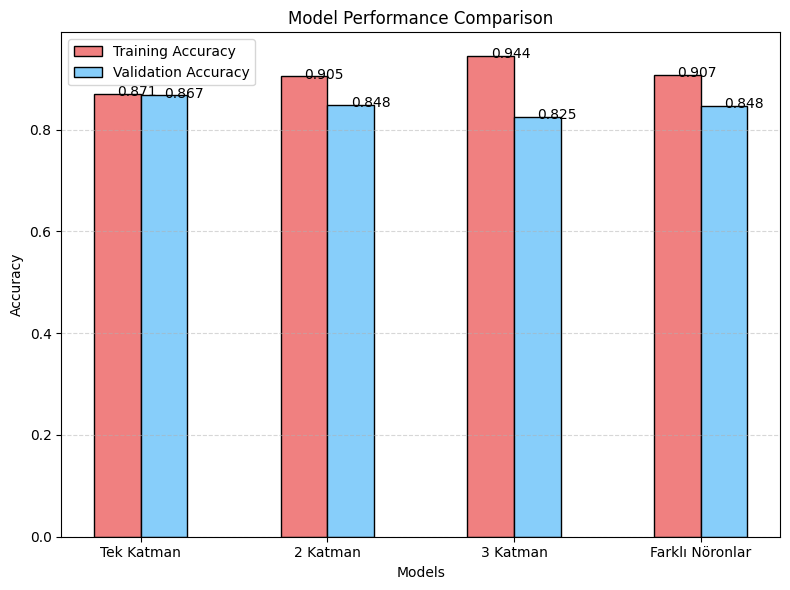

In [ ]:
# Grafiği daha küçük bir boyuta ayarlayalım
plt.figure(figsize=(8, 6))

# Çubukların genişliğini azaltalım
bar_width = 0.25

# Çubuk grafikleri oluşturalım
bars1 = plt.bar(x - bar_width/2, train_acc, bar_width, label='Training Accuracy', color='lightcoral', edgecolor='black')
bars2 = plt.bar(x + bar_width/2, val_acc, bar_width, label='Validation Accuracy', color='lightskyblue', edgecolor='black')

# Çubukların üzerine accuracy değerlerini ekleyelim
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.01, round(yval, 3), va='bottom')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 0.01, round(yval, 3), va='bottom')

# Eksen ve başlık belirleyelim
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()

# Grid ekleyelim
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Grafiği gösterelim
plt.show()
